In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns; sns.set()
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
df = pd.read_csv('samples_analyzed.csv')

#drop duplicates
df = df.drop_duplicates(subset='sha256', keep="first")

#change column name to a more "readable" format
df.rename(columns={'sha256':'sha256','entropy':'entropy', 'encryption_detected':'encryption', 'packer_detected':'packer',
                         'suspect_imported_functions':'suspicious imports', 'unknown_imported_functions':'unknown imports',
                         'vt_hits':'vt hits', 'final_score':'S(Sample)'}, 
                 inplace=True)

#dataset statistics
df.describe()

,entropy,encryption,packer,suspicious imports,unknown imports,vt hits,S(Sample)
count,23045.000000,23045.000000,23045.000000,23045.000000,23045.000000,21343.000000,23045.000000
mean,6.320872,0.633239,0.872727,6.862660,0.045216,8.073373,2.941536
std,1.188331,0.481931,0.333285,7.797322,0.207782,11.742435,0.961091
min,0.307754,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000
25%,5.539176,0.000000,1.000000,0.000000,0.000000,0.000000,2.196375
50%,6.361192,1.000000,1.000000,4.000000,0.000000,2.000000,3.000000
75%,7.344716,1.000000,1.000000,11.000000,0.000000,12.000000,3.500000
max,7.999897,1.000000,1.000000,54.000000,1.000000,60.000000,6.242447


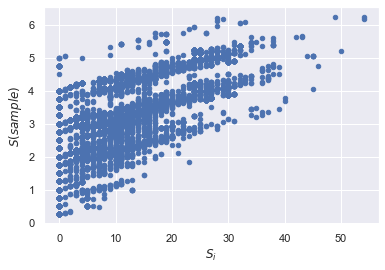

In [2]:
#plot graphics

fig, ax = plt.subplots()
df.plot.scatter(x='suspicious imports', y='S(Sample)', ax=ax)
ax.set_ylabel("$S(sample)$")
ax.set_xlabel("$S_i$")
plt.show()

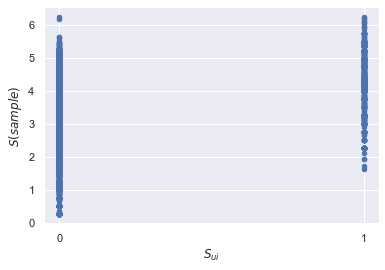

In [3]:
fig, ax = plt.subplots()
df.plot.scatter(x='unknown imports', y='S(Sample)', ax=ax);
ax.set_ylabel("$S(sample)$")
ax.set_xlabel("$S_{ui}$")
plt.xticks(range(0,2))
plt.show()

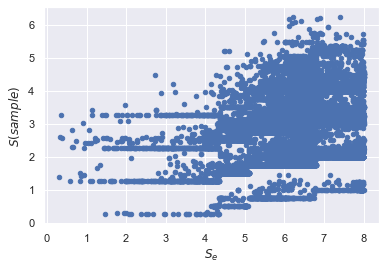

In [4]:
fig, ax = plt.subplots()
df.plot.scatter(x='entropy', y='S(Sample)', ax=ax);
ax.set_ylabel("$S(sample)$")
ax.set_xlabel("$S_{e}$")
plt.xticks(range(0,9))
plt.show()

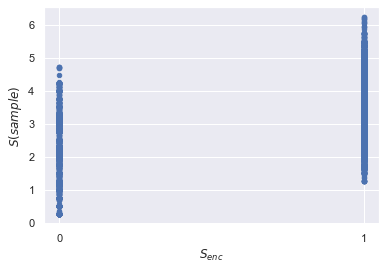

In [5]:
fig, ax = plt.subplots()
df.plot.scatter(x='encryption', y='S(Sample)', ax=ax);
ax.set_ylabel("$S(sample)$")
ax.set_xlabel("$S_{enc}$")
plt.xticks(range(0,2))
plt.show()

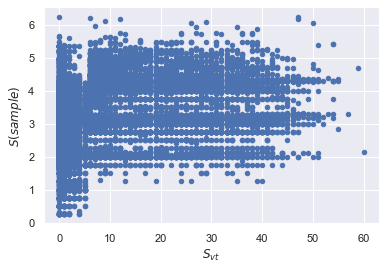

In [6]:
fig, ax = plt.subplots()
df.dropna(subset=['vt hits']).plot.scatter(x='vt hits', y='S(Sample)', ax=ax);
ax.set_ylabel("$S(sample)$")
ax.set_xlabel("$S_{vt}$")
plt.show()

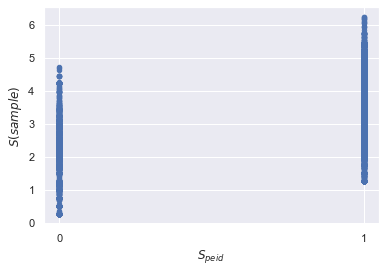

In [7]:
fig, ax = plt.subplots()
df.plot.scatter(x='packer', y='S(Sample)', ax=ax);
ax.set_ylabel("$S(sample)$")
ax.set_xlabel("$S_{peid}$")
plt.xticks(range(0,2))
plt.show()

In [8]:
filteredDF = df[(df['entropy'] > 6) & (df['suspicious imports'] == 0) ]
filteredDF.count()[0]

4183

In [9]:
df[(df['S(Sample)']>4)].count()[0]

3682

In [10]:
df[(df['S(Sample)']>5)].count()[0]

391

In [11]:
df[(df['packer']==1)].count()[0]

20112

In [12]:
df[(df['vt hits']>5)].count()[0]

7403

In [13]:
df[(df['entropy']>6)].count()[0]

14053

In [14]:
df[(df['encryption']==1)].count()[0]

14593

In [15]:
df[(df['entropy']>=6.361192)].count()[0]

11523

In [16]:
df[(df['unknown imports']>0)].count()[0]

1042

In [17]:
df[(df['S(Sample)']==0.250000)].count()[0]

32

In [18]:
df[(df['S(Sample)']==0.250000)]

,sha256,entropy,encryption,packer,suspicious imports,unknown imports,vt hits,S(Sample)
1636,2b48b9a8b0fa7618554f238aca7ebd885af0ec95d3c9d9...,3.990041,0,0,0,0,4.0,0.25
2256,3f55177d5085be77e0db40f3fef5d97ed9b5d1f16c6fda...,4.328549,0,0,0,0,0.0,0.25
3063,5db93baa0b22e323afc69456fb1c33ea94c7514feb0903...,3.518342,0,0,0,0,0.0,0.25
3542,4972dfaa1a5386153a8ce48f7e299813910bbc1d71d593...,2.560595,0,0,0,0,1.0,0.25
3935,2f1be96dc9ddec1378cd12bf2210d711cf23c1af3ff0a5...,4.318776,0,0,0,0,0.0,0.25
4148,7ab73ff321d56682e9b810470739bd982930bfc3381015...,4.332882,0,0,0,0,2.0,0.25
6144,597a8103e5cc54275e3d1625e4cccab7809c26af8c4c69...,3.987436,0,0,0,0,0.0,0.25
6302,8f91de8ebad1d53bf0f38663e52d43257b17de7df53f1c...,4.325582,0,0,0,0,2.0,0.25
8296,a3424e5820364bea5c9faaca8a465b0d32080f78d90639...,2.994159,0,0,0,0,0.0,0.25
8393,ba6da8eb9c21bd28aab4615f6fa900e1aef5d6dfdb4e86...,3.765327,0,0,0,0,0.0,0.25


In [19]:
df[(df['S(Sample)']>6.24)]

,sha256,entropy,encryption,packer,suspicious imports,unknown imports,vt hits,S(Sample)
6672,0e4268886b51126b9d35ce9c046d2d285e5c294c9bd850...,6.226325,1,1,54,1,0.0,6.242447


In [20]:
#genrate data for latex table ()
data=df

print ('\\no & \\no & \\no & %d & %.2f \\\\'%(data.loc[(data['unknown imports']==0) & (data['encryption']==0) & (data['packer']==0)].count()['S(Sample)'],data.loc[(data['unknown imports']==0) & (data['encryption']==0) & (data['packer']==0)].mean()['S(Sample)']))
print ('\\no & \\no & \\yes & %d & %.2f \\\\'%(data.loc[(data['unknown imports']==0) & (data['encryption']==0) & (data['packer']==1)].count()['S(Sample)'],data.loc[(data['unknown imports']==0) & (data['encryption']==0) & (data['packer']==1)].mean()['S(Sample)']))
print ('\\no & \\yes & \\no & %d & %.2f \\\\'%(data.loc[(data['unknown imports']==0) & (data['encryption']==1) & (data['packer']==0)].count()['S(Sample)'],data.loc[(data['unknown imports']==0) & (data['encryption']==1) & (data['packer']==0)].mean()['S(Sample)']))
print ('\\no & \\yes & \\yes & %d & %.2f \\\\'%(data.loc[(data['unknown imports']==0) & (data['encryption']==1) & (data['packer']==1)].count()['S(Sample)'],data.loc[(data['unknown imports']==0) & (data['encryption']==1) & (data['packer']==1)].mean()['S(Sample)']))
print ('\\yes & \\no & \\no & %d & %.2f \\\\'%(data.loc[(data['unknown imports']==1) & (data['encryption']==0) & (data['packer']==0)].count()['S(Sample)'],data.loc[(data['unknown imports']==1) & (data['encryption']==0) & (data['packer']==0)].mean()['S(Sample)']))
print ('\\yes & \\no & \\yes & %d & %.2f \\\\'%(data.loc[(data['unknown imports']==1) & (data['encryption']==0) & (data['packer']==1)].count()['S(Sample)'],data.loc[(data['unknown imports']==1) & (data['encryption']==0) & (data['packer']==1)].mean()['S(Sample)']))
print ('\\yes & \\yes & \\no & %d & %.2f \\\\'%(data.loc[(data['unknown imports']==1) & (data['encryption']==1) & (data['packer']==0)].count()['S(Sample)'],data.loc[(data['unknown imports']==1) & (data['encryption']==1) & (data['packer']==0)].mean()['S(Sample)']))
print ('\\yes & \\yes & \\yes & %d & %.2f \\\\'%(data.loc[(data['unknown imports']==1) & (data['encryption']==1) & (data['packer']==1)].count()['S(Sample)'],data.loc[(data['unknown imports']==1) & (data['encryption']==1) & (data['packer']==1)].mean()['S(Sample)']))

\no & \no & \no & 1180 & 1.37 \\
\no & \no & \yes & 6998 & 2.27 \\
\no & \yes & \no & 1699 & 2.35 \\
\no & \yes & \yes & 12126 & 3.46 \\
\yes & \no & \no & 7 & 2.22 \\
\yes & \no & \yes & 267 & 3.26 \\
\yes & \yes & \no & 47 & 3.55 \\
\yes & \yes & \yes & 721 & 4.51 \\


In [21]:
pd.set_option('display.max_colwidth', -1)
df[(df['S(Sample)']>4)].sample(30)['sha256']

<ipython-input-21-aeb75a51c8c0>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


16748    0305331a319e1a212861c02700f0eb306737b285b543bf5874f38b64b14244cb
5733     0515e44999cde9023e382280f936a84a0510f7718df04db60b485cf98549fe11
8517     476d2cf72bebec4d0f76011f2757729fb6a87dee046cba0f299f46e1fb382ca3
5788     e1e9b58517db28ff5fcdbbd1e7bc7817e255052ef19dffb97fe00dcbebd95e04
4260     3b1d3c0aef679d0e25dee3f2508cab4aa5631fb0660f015c03a664f9df35b4f0
19318    3ec197e36d7dc8da47a9773be4c01222bf340f167576baa0817e867727d45cf8
13836    b16485ea8d9e780a77e5c9a760947fbe83dd056c806b249f047a7ce8d2280397
680      c50162739c04a60add73609ee1930584cde420f929fa5993989ec9f63bd50baa
20232    b613c7154ba9a7bdb7ed80fbcf206d9aa92c72733af7d977c4ceef70929af59b
20276    e331a4d18ef9abafcfa3feefd6455bb3d8e44e828501dd93810b0e8f369bf2b2
20656    cbdf84a404519d344731e7cd06c0f03fbd71c7311bad83571cc8880ab6d38072
13608    71eb9cf51a11ae4fc6719b456b9c1ffb5ca85c147134020fc7b89ad8ff137b8a
18285    d8008c48d50f821bdafb075316bd0170004d12b821ef4e50f4d232cab558c741
25559    0046bd8ec5ed92d4d94070ea9ef7d

In [22]:
pd.set_option('display.max_colwidth', -1)
df[(df['S(Sample)']>5)].sample(30)['sha256']

<ipython-input-22-836f97bd7af7>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


21376    014b68b8bdc7c210187e967066cf647e71c6e3c1e785e31f02fe8350343cd94b
17101    2702185f623dc1401e4faeee3cb6588f04b280c8fcaf44ff79fe4e83c51849f4
15033    0b4d364c510fdf7ba281e3868de98e36beaac3957340c9b65da9d31b8297e69f
19025    a744e596f2082dd513f8ddb9d11b23f2ab69a27ce76ee52b14a97a7304370b77
25867    dafa6670a98396c39da04c18aa3db761b925c70b3967e8bf3d4c3d795a5a7ef3
18635    ba5ac6a20fa55b6b4f48d4919beb7031c0367df1058677d88ddc9398cd6982dc
12966    6ee0c20b5caa25408f254bf926242aba301bed7491495faaf8b5efe8e1be92a7
9157     b6b520b2d2e23a506a132299fd5fdde5d5f0d45c6c7fbd49a42e90d5f4dfca4f
2927     53bb815d176f18e0f8f7a7eefa2712ab6901fb70b7bb3151a02ad162c935267b
5248     0d8d06c0be7c790fc87a80dc0eaeca72fb35931c20a31921f77e4108213a2e2a
19933    83a94349266b5cea66066e292bdd2386599a937e03383303886248220b61246f
4657     241057c62400c5988314d890d5611928ec13db7fb286572df8a62e57ffbb76ce
23146    d8c92e0cc24b96a6a0c101ab672f435ff2afa9e729725d554cc97661a389a76f
22992    b9a807df1d02e608bb5cb8876d389

In [23]:
df[(df['S(Sample)']>6.24)]

,sha256,entropy,encryption,packer,suspicious imports,unknown imports,vt hits,S(Sample)
6672,0e4268886b51126b9d35ce9c046d2d285e5c294c9bd85032f5670dc8570d8f48,6.226325,1,1,54,1,0.0,6.242447
